In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
message = pd.read_csv("IMDB Dataset.csv")

In [3]:
message.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
def text_process(mess):
    #retirar as pontuacoes
    nopunc = [char for char in mess if char not in string.punctuation]
    
    #juntar para formar novamente as string
    nopunc = ''.join(nopunc)
    
    #remover as stopwords
    sms = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return sms

In [5]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # Tokeniza as mensagens
    ('tfidf', TfidfTransformer()),  # Faz a transformação em TF-IDF
    ('classifier', MultinomialNB()),  # Define a classe que realizará nossa classificação.
])

In [7]:
msg_train, msg_test, label_train, label_test = train_test_split(message['review'], message['sentiment'], test_size=0.3)

print(len(msg_train), len(msg_test), len(msg_train) , len(msg_test))

35000 15000 35000 15000


In [8]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001B31E665A68>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [9]:
predictions = pipeline.predict(msg_test)

In [10]:
print(accuracy_score(label_test,predictions))

0.8695333333333334


In [11]:
confusion_matrix = confusion_matrix(label_test,predictions)
print(confusion_matrix)

[[6606  790]
 [1167 6437]]


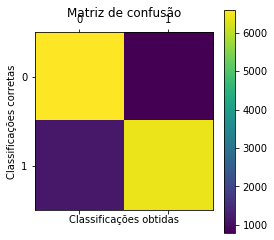

In [12]:
plt.matshow(confusion_matrix)
plt.title("Matriz de confusão")
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações obtidas")
plt.show()